### Perform K-Means Clustering for the crime_std data and identify the number of clusters formed and draw inferences.

Data Description:
Murder -- Muder rates in different places of United States
Assualt- Assualt rate in different places of United States
UrbanPop - urban population in different places of United States
Rape - Rape rate in different places of United States


In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [24]:
df = pd.read_csv("./crime_std.csv")
print(df)

    Unnamed: 0    Murder   Assault  UrbanPop      Rape
0            0  0.746988  0.654110  0.440678  0.359173
1            1  0.554217  0.746575  0.271186  0.961240
2            2  0.439759  0.852740  0.813559  0.612403
3            3  0.481928  0.496575  0.305085  0.315245
4            4  0.493976  0.791096  1.000000  0.860465
5            5  0.427711  0.544521  0.779661  0.811370
6            6  0.150602  0.222603  0.762712  0.098191
7            7  0.307229  0.660959  0.677966  0.219638
8            8  0.879518  0.993151  0.813559  0.635659
9            9  1.000000  0.568493  0.474576  0.478036
10          10  0.271084  0.003425  0.864407  0.333333
11          11  0.108434  0.256849  0.372881  0.178295
12          12  0.578313  0.698630  0.864407  0.431525
13          13  0.385542  0.232877  0.559322  0.354005
14          14  0.084337  0.037671  0.423729  0.103359
15          15  0.313253  0.239726  0.576271  0.276486
16          16  0.536145  0.219178  0.338983  0.232558
17        

In [25]:
df.columns

Index(['Unnamed: 0', 'Murder', 'Assault', 'UrbanPop', 'Rape'], dtype='object')

In [26]:
df.drop(["Unnamed: 0", "Assault", "Rape"], axis = 1, inplace = True)
df.columns

Index(['Murder', 'UrbanPop'], dtype='object')

In [27]:
from sklearn.cluster import KMeans

In [30]:
wss = []
for k in range(1, 11):
    kmeans_model = KMeans(n_clusters = k, random_state = 12345)
    kmeans_model.fit(df)
    wss.append(kmeans_model.inertia_)

/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

In [32]:
print(wss)

[6.322595885700818, 3.87046887412857, 2.3360023869016024, 1.5945835031923499, 1.2961009121030969, 1.044865579400536, 0.8936437169551092, 0.7019102459785223, 0.6144446116165496, 0.5343316035680303]


Text(0.5, 1.0, 'population vs murder')

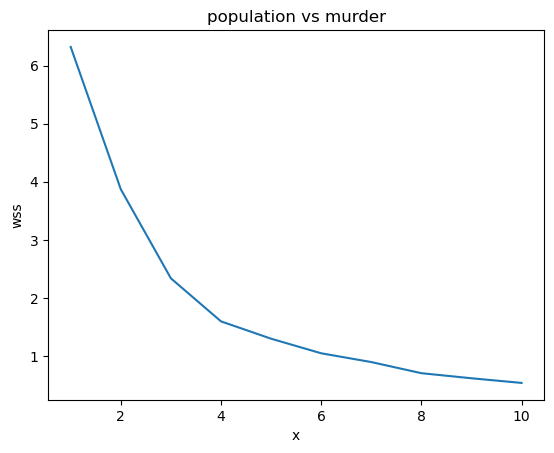

In [33]:
x = np.arange(1,11)
plt.plot(x,wss)
plt.xlabel("x")
plt.ylabel("wss")
plt.title("population vs murder")

In [42]:
kmeans_model = KMeans(n_clusters = 4, random_state = 12345)
kmeans_model.fit(df)

/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=4, random_state=12345)

In [43]:
kmeans_model.labels_

array([1, 1, 2, 1, 2, 2, 0, 0, 2, 1, 0, 3, 2, 0, 3, 0, 1, 1, 3, 2, 0, 2,
       0, 1, 2, 3, 0, 2, 3, 2, 2, 2, 1, 3, 0, 0, 0, 0, 0, 1, 3, 1, 2, 0,
       3, 0, 0, 3, 0, 0], dtype=int32)

In [46]:
kmeans_model.cluster_centers_

array([[0.26204819, 0.66949153],
       [0.74216867, 0.3559322 ],
       [0.59128823, 0.79921773],
       [0.13587684, 0.2693032 ]])

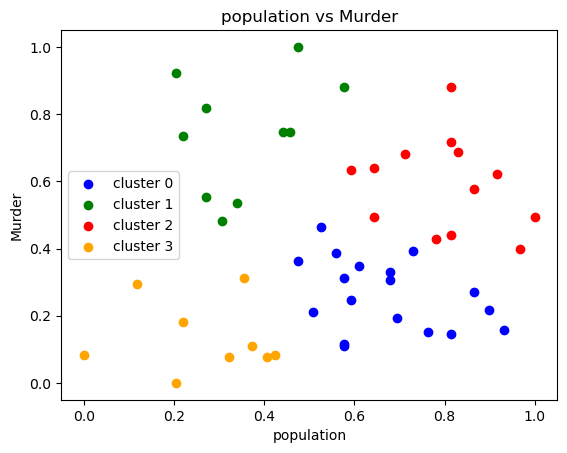

In [47]:
colors = ["blue", "green", "red", "orange"]
for cluster in range(len(kmeans_model.cluster_centers_)):
    plt.scatter(df['UrbanPop'][kmeans_model.labels_ == cluster], 
                df['Murder'][kmeans_model.labels_ == cluster],
                color=colors[cluster], label=f"cluster {cluster}")
plt.title("population vs Murder")
plt.xlabel("population")
plt.ylabel("Murder")
plt.legend()